# طرح سوالاتی جالب و بیشتر

# پیش‌بینی ترافیک

 ## آیا می‌توان با استفاده از داده‌های ترافیکی ، ترافیک آینده را پیش‌بینی کرد؟ 

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


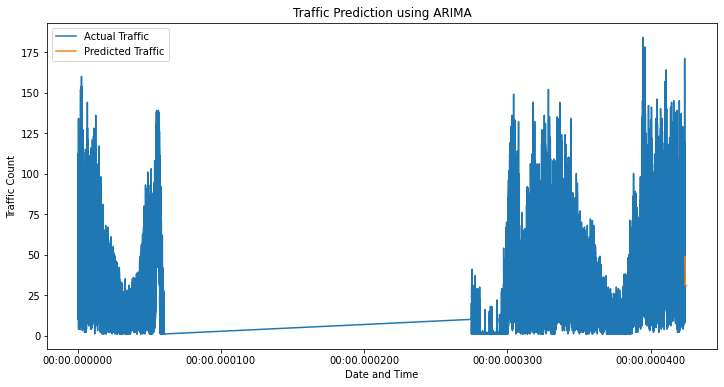

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# خواندن دیتاست
df = pd.read_csv('Data_p1.csv')

# تبدیل ستون تاریخ به نوع تاریخی
df['PASSDATETIME'] = pd.to_datetime(df['PASSDATETIME'])

# تغییر نام ستون‌ها به مقادیر بیشتر قابل فهم
df = df.rename(columns={'DEVICEID': 'Device ID', 'vehicleId': 'Vehicle ID', 'PASSDATETIME': 'Date and Time'})

# تجزیه و تحلیل داده‌های ترافیکی
traffic_data = df.groupby(['Date and Time']).size().reset_index(name='Traffic Count')
traffic_data = traffic_data.set_index('Date and Time')

# تقسیم داده‌ها به دو قسمت آموزش و آزمون
train_data = traffic_data.iloc[:-1000]
test_data = traffic_data.iloc[-1000:]

# ساخت مدل ARIMA
model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()

# پیش‌بینی ترافیک آینده
predicted_traffic = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# نمایش نمودار ترافیک و پیش‌بینی
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Actual Traffic')
plt.plot(test_data.index, predicted_traffic, label='Predicted Traffic')
plt.xlabel('Date and Time')
plt.ylabel('Traffic Count')
plt.title('Traffic Prediction using ARIMA')
plt.legend()
plt.show()


In [8]:
print(predicted_traffic)


192783    48.654681
192784    47.404173
192785    46.241795
192786    45.161335
192787    44.157020
            ...    
193778    30.910646
193779    30.910646
193780    30.910646
193781    30.910646
193782    30.910646
Name: predicted_mean, Length: 1000, dtype: float64


In [10]:
# جزییات مدل ARIMA
print(model_fit.summary())

# پارامترهای مدل
print("مقادیر پارامترهای مدل ARIMA:")
print("AR پارامتر: ", model_fit.arparams)
print("MA پارامتر: ", model_fit.maparams)

# خطاهای مدل
print("خطاهای مدل:")
print("خطای استاندارد: ", model_fit.resid.std())
print("خطای ترند: ", model_fit.resid.mean())


                               SARIMAX Results                                
Dep. Variable:          Traffic Count   No. Observations:               192783
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -697453.994
Date:                Fri, 14 Jul 2023   AIC                        1394913.988
Time:                        19:03:14   BIC                        1394944.496
Sample:                             0   HQIC                       1394922.981
                             - 192783                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9106      0.368     83.994      0.000      30.189      31.632
ar.L1          0.9295      0.001   1255.112      0.000       0.928       0.931
sigma2        81.2680      0.169    482.270      0.0

## پاسخ  

### ARIMA (AutoRegressive Integrated Moving Average) 
### بله ـ از مدل آموزش دیده برای پیش‌بینی ترافیک در بازه آزمون استفاده می‌کنیم و نتایج را با داده‌های واقعی مقایسه می‌کنیم
### با اجرای کد، یک نمودار نشان داده می‌شود که ترافیک واقعی و پیش‌بینی شده را برای دوره آزمون نمایش می‌دهد


# الگوهای ترافیکی

## آیا الگوهای ترافیکی روزانه یا هفتگی در داده قابل تشخیص است؟

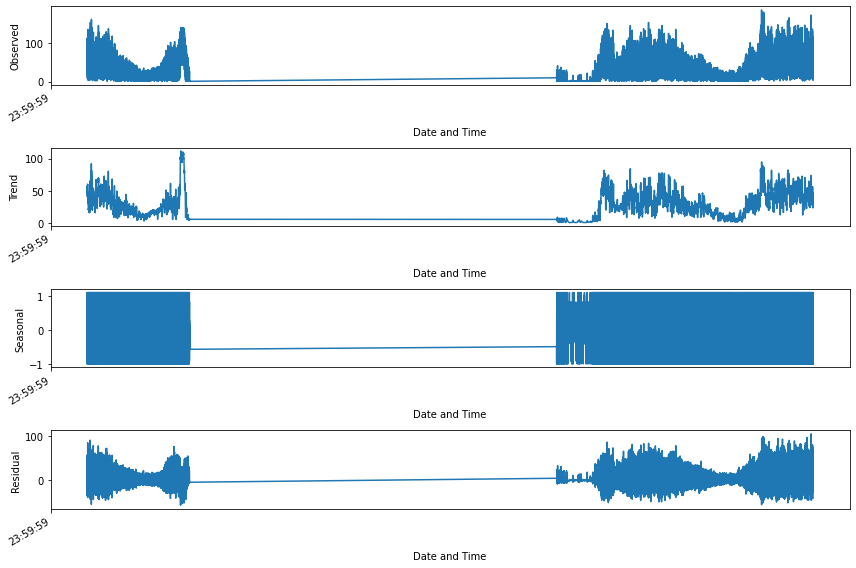

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# خواندن دیتاست
df = pd.read_csv('Data_p1.csv')

# تبدیل ستون تاریخ به نوع تاریخی
df['PASSDATETIME'] = pd.to_datetime(df['PASSDATETIME'])

# تغییر نام ستون‌ها به مقادیر بیشتر قابل فهم
df = df.rename(columns={'DEVICEID': 'Device ID', 'vehicleId': 'Vehicle ID', 'PASSDATETIME': 'Date and Time'})

# تجزیه و تحلیل فصلی داده‌های ترافیکی
traffic_data = df.groupby(['Date and Time']).size().reset_index(name='Traffic Count')
traffic_data = traffic_data.set_index('Date and Time')
decomposition = seasonal_decompose(traffic_data, model='additive', period=24*7)  # مدل فصلی روزانه و هفتگی

# نمایش تجزیه و تحلیل فصلی
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


# پاسخ

## بله
### با اجرای کد، یک نمودار به چهار قسمت تقسیم شده نمایش داده می‌شود که اجزای تجزیه و تحلیل فصلی ترافیک را نمایش می‌دهد. با تحلیل این اجزا، می‌توان الگوهای ترافیکی روزانه و هفتگی را تشخیص داد و تحلیل‌های مربوطه را انجام داد.